# T1 Q3

---

In [1]:
import math
import csv
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Q1

---

In [3]:
K_true = 10
def generate_aj (K_true):
    a_j = []
    for i in range(0, K_true+1):
        a_j.append(rand.uniform(-1,1))
    return a_j
a_j = generate_aj (K_true)

In [4]:
N = 20
def generate_data (N):
    data = []
    for j in range(0, N):
        data.append(rand.uniform(-5,5))
    return data
data = generate_data(N)

In [5]:
def poly (data, a_j):
    poly_output = []
    for x in data: 
        total_sum = 0
        for j in range(len(a_j)):
            total_sum += a_j[j]*(x**j)
        poly_output.append(total_sum)
    return poly_output
poly_rand_output = poly (data, a_j)

In [6]:
def compute_y (data, a_j):  
    y_i_prior = poly (data, a_j)
    eps_lst = []
    for i in range(len(data)):
        eps_lst.append(np.random.normal(0, np.sqrt((max(y_i_prior) - min(y_i_prior))/10.)))
    y_i = np.add(y_i_prior, eps_lst)
    return y_i
y_i = compute_y (data, a_j)

In [7]:
def a_vector_lst (data, y_i, k_high):
    return (np.polyfit(data, y_i, k_high, full=True))
a_lst, _, _, chi, _ = a_vector_lst(data, y_i, K_true)
poly_output = poly (data, a_lst[::-1])

## Q2

---

In [8]:
sigma = (max(poly_output) - min(poly_output)) / 10.0
print sigma

142047.504661


In [9]:
def chi_square (X, Y):
    return np.sum((np.array(Y) - np.array(X)) ** 2) / sigma
chi_square(poly_output, y_i)

3.7389553172792365

In [10]:
def min_chi (y_i, k_high):
    a_lst, residuals, _, _, _ = a_vector_lst(data, y_i, k_high)
    poly_output = poly (data, a_lst[::-1])
    min_chi_val = chi_square (poly_output, y_i)
    return min_chi_val
min_val = min_chi(y_i, K_true)
print K_true, min_val

10 3.73895531728


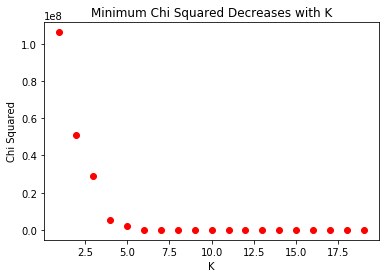

In [28]:
N = 20
data = generate_data(N)
a_j = generate_aj (K_true)
y_i = compute_y (data, a_j)
a_lst, _, _, chi, _ = a_vector_lst(data, y_i, K_true)
poly_output = poly (data, a_lst[::-1])
sigma = (max(poly_output) - min(poly_output)) / 10.0
chi_lst = []
for k in range(1, 20):
    chi_lst.append(min_chi (y_i, k))
#     print k, min_chi (y_i, k)
plt.plot(range(1,20), chi_lst, 'ro')
plt.xlabel("K")
plt.ylabel("Chi Squared")
plt.title("Minimum Chi Squared Decreases with K")
plt.show()

## Q3

---

In [12]:
N = 20
total_bic_lst = []
for i in range(500):
    data = generate_data(N)
    a_j = generate_aj (K_true)
    y_i = compute_y (data, a_j)
    a_lst, residuals, _, _, _ = a_vector_lst(data, y_i, K_true)
    poly_output = poly (data, a_lst[::-1])
    sigma = (max(poly_output) - min(poly_output)) / 10.0
    bic_val_lst = []
    for k_high in range(1, 20):
        min_val = min_chi(y_i, k_high)
        bic_val = N/2.*math.log(2*math.pi*sigma) - N * math.e + 1./2.*min_val + (k_high+1)/2.*math.log(N)
        bic_val_lst.append(bic_val)
    total_bic_lst.append(np.argmin(bic_val_lst)+1)
print np.mean(total_bic_lst), np.std(total_bic_lst)

10.07 0.681982404465


### Q4

---

In [15]:
N = 3*np.logspace(0,4,40)
n_behavior = []
for num_n in N:
    total_bic_lst = []
    for i in range(500):
        data = generate_data(int(num_n))
        a_j = generate_aj (K_true)
        y_i = compute_y (data, a_j)
        a_lst, _, _, _, _ = a_vector_lst(data, y_i, K_true)
        poly_output = poly (data, a_lst[::-1])
        sigma = (max(poly_output) - min(poly_output)) / 10.0
        bic_val_lst = []
        for k_high in range(1, 20):
            min_val = min_chi(y_i, k_high)
            bic_val = num_n/2.*math.log(2*math.pi*sigma) - num_n * math.e + 1./2.*min_val + k_high/2.*math.log(num_n)
            bic_val_lst.append(bic_val)
        total_bic_lst.append(np.argmin(bic_val_lst)+1)
    n_behavior.append([np.mean(total_bic_lst), np.std(total_bic_lst)]) 

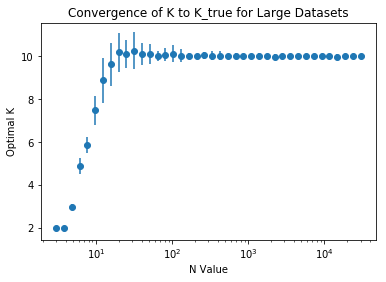

In [16]:
x = 3*np.logspace(0,4,40)
y = [i for [i,j] in n_behavior]
e = [j for [i,j] in n_behavior]

plt.errorbar(x, y, e, linestyle='None', marker='o')
plt.xscale('log')
plt.xlabel('N Value')
plt.ylabel('Optimal K')
plt.title('Convergence of K to K_true for Large Datasets')
plt.show()